# Self Organizing Map

### Importing the libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### importing the dataset

In [11]:
dataset=pd.read_csv('Credit_Card_Applications.csv')

In [12]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

### Feature Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)

In [14]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

### Tranning the som

In [15]:
from minisom import MiniSom

In [16]:
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

### visualizing the results

In [17]:
from pylab import bone, pcolor, colorbar, plot, show

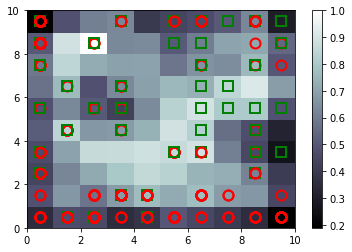

In [18]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']
for i,x in enumerate(X):
    w=som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[Y[i]],
         markeredgecolor=colors[Y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2
        )
show()    

### finding the fraud

In [23]:
mappings=som.win_map(X)
frauds=mappings[(2,8)]
# frauds=np.concatenate((mappings[(2,3)],mappings[(8,4)]),axis=1)
frauds=sc.inverse_transform(frauds)

In [26]:
frauds

[array([0.75232352, 1.        , 0.19548872, 0.04017857, 0.5       ,
        1.        , 0.875     , 0.04385965, 1.        , 0.        ,
        0.        , 0.        , 0.5       , 0.        , 0.05298   ]),
 array([0.80274618, 0.        , 0.16165414, 0.01785714, 0.5       ,
        0.76923077, 0.875     , 0.05263158, 1.        , 0.        ,
        0.        , 0.        , 0.5       , 0.14      , 0.00824   ]),
 array([0.47654858, 0.        , 0.20932331, 0.05357143, 0.5       ,
        0.46153846, 0.375     , 0.07017544, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.184     , 0.        ]),
 array([0.92713301, 1.        , 0.14541353, 0.02089286, 0.5       ,
        0.53846154, 0.875     , 0.00298246, 1.        , 0.        ,
        0.        , 0.        , 0.5       , 0.09      , 0.        ]),
 array([0.82735685, 0.        , 0.21548872, 0.53571429, 0.        ,
        0.69230769, 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.5     